This snippet showcases a sample Machine Learning pipeline for            
unsupervised learning using IRIS data set. The steps include:    
                                                                          
1. PREPARE DATA  
  a) Load data set into CAS                                            
<br>                                                                          
2. PERFORM UNSUPERVISED LEARNING  
  a) Generate Principal Components  
  b) Analyze Clusters                                                  
<br>                                                                          
3. VISUALIZE THE RESULTS  
  a) Examine the clustering plot  
  b) Identify clusters in a PCA plot                                   

### Import packages

In [1]:
from swat import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from swat.render import render_html
%matplotlib inline

### CAS Server connection details

In [2]:
cashost='sasserver.demo.sas.com'
casport=5570
casauth='~/.authinfo'

### Start CAS session

In [3]:
sess = CAS(cashost, casport, authinfo=casauth, caslib="casuser")

### Import action sets

In [4]:
sess.loadactionset(actionset="clustering")
sess.loadactionset(actionset="pca")

NOTE: Added action set 'clustering'.
NOTE: Added action set 'pca'.


[actionset]

 'pca'

+ Elapsed: 0.000899s, user: 0.001s, mem: 0.032mb

### Set variables for input data

In [5]:
indata_dir         = "data"
indata             = "iris"

### Load data into CAS if needed

In [6]:
if not sess.table.tableExists(table=indata).exists:
    sess.loadTable(caslib="casuser", path=indata_dir+"/"+indata+".sas7bdat", casout={"name":indata})

NOTE: Cloud Analytic Services made the file data/iris.sas7bdat available as table IRIS in caslib CASUSER(viyauser).


### Perform a principal components analysis

In [7]:
p = sess.pca.eig(
  table={"name":"iris"},
  inputs={"sepallength", "sepalwidth", "petallength", "petalwidth"},
  output={"casOut" : {"name" : "scored_pca", "replace" : True}, "copyVars": {"Species"}},
)

render_html(p)

Model Information 
 Description 
 Value 
 
 
 Data Source IRIS 
 Component Extraction Method Eigenvalue Decomposition 
 
 
 
 
 Number of Variables 
 Description 
 Value 
 
 
 Number of Variables 4 
 Number of Principal Components 4 
 
 
 
 
 Number of Observations 
 Description 
 Value 
 
 
 Number of Observations Read 150 
 Number of Observations Used 150 
 
 
 
 
 Simple Statistics 
 Variable 
 Label 
 Mean 
 Standard Deviation 
 
 
 SepalWidth Sepal Width in mm. 30.573333333 4.3586628494 
 SepalLength Sepal Length in mm. 58.433333333 8.2806612798 
 PetalLength Petal Length in mm. 37.58 17.652982333 
 PetalWidth Petal Width in mm. 11.993333333 7.6223766896 
 
 
 
 
 Correlation Matrix 
 Variable 
 Label 
 SepalWidth 
 SepalLength 
 PetalLength 
 PetalWidth 
 
 
 SepalWidth Sepal Width in mm. 1 -0.117569784 -0.428440104 -0.366125933 
 SepalLength Sepal Length in mm. -0.117569784 1 0.8717537759 0.8179411263 
 PetalLength Petal Length in mm. -0.428440104 0.8717537759 1 0.9628654314 
 PetalWidth Petal Width in mm. -0.366125933 0.8179411263 0.9628654314 1 
 
 
 
 
 Eigenvalues 
 Number 
 Eigenvalue 
 Difference 
 Proportion 
 Cumulative 
 
 
 1 2.9184978165 2.0044673451 0.7296244541 0.7296244541 
 2 0.9140304715 0.7672735959 0.2285076179 0.958132072 
 3 0.1467568756 0.1260420391 0.0366892189 0.9948212909 
 4 0.0207148364 nan 0.0051787091 1 
 
 
 
 
 Eigenvectors 
 Variable 
 Label 
 Prin1 
 Prin2 
 Prin3 
 Prin4 
 
 
 SepalWidth Sepal Width in mm. -0.269347443 0.9232956595 0.2443817795 0.1235096196 
 SepalLength Sepal Length in mm. 0.5210659147 0.3774176156 -0.719566353 -0.26128628 
 PetalLength Petal Length in mm. 0.5804130958 0.0244916091 0.1421263693 0.8014492463 
 PetalWidth Petal Width in mm. 0.5648565358 0.066941987 0.6342727371 -0.523597135 
 
 
 
 
 Timing 
 Task 
 Time 
 Relative Time 
 
 
 Setup and Parsing 0.0013668537 0.1899224806 
 Computing Moments 0.0002660751 0.0369707812 
 Computing Principal Components 0.0011160374 0.1550718876 
 Producing Output Data 0.004442215 0.61723978 
 Cleanup 1.9073486E-6 0.0002650235 
 Total 0.0071969032 1 
 
 
 
 
 Output CAS Tables 
 CAS Library 
 Name 
 Label 
 Number of Rows 
 Number of Columns 
 Table 
 
 
 CASUSER(viyauser) scored_pca 150 5 CASTable('scored_pca', caslib='CASUSER(viyauser)')

### Output Scree Plot and Variance Explained Plot

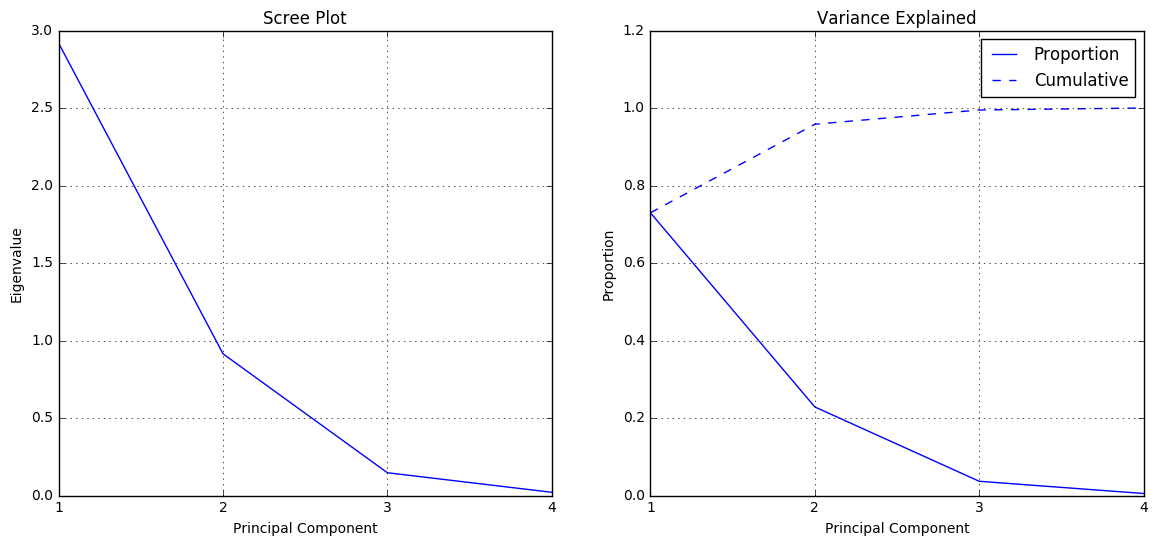

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(p.Eigenvalues.Number, p.Eigenvalues.Eigenvalue)
plt.xticks(np.arange(1, 5, 1.0))
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.title("Scree Plot")

plt.subplot(1, 2, 2)
plt.plot(p.Eigenvalues.Number, p.Eigenvalues.Proportion, label="Proportion")
plt.plot(p.Eigenvalues.Number, p.Eigenvalues.Cumulative, linestyle='dashed', color="b", label="Cumulative")
plt.xticks(np.arange(1, 5, 1.0))
plt.xlabel("Principal Component")
plt.ylabel("Proportion")
plt.grid(True)
plt.legend(loc="best")
plt.title("Variance Explained");


### Perform a cluster analysis

In [9]:
c = sess.clustering.kClus(
  table={"name":"scored_pca"},
  inputs={"Score1", "Score2"}, 
  output={"casOut" : {"name" : 'kClusOutputScore', "replace" : True}, 
          "copyVars": {"Score1", "Score2"}},
  impute="MEAN",
  maxiters=50,
  distance="EUCLIDEAN",
  standardize="STD",
  nClusters=3
)

render_html(c)

NOTE: Using SEED=1352617267.
NOTE: Running for input data for K 3.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.


{'outputNObs': 150.0, 'outputNVars': 5} 
 
 
 Number of Observations 
 Type 
 N 
 
 
 Number of Observations Read 150 
 Number of Observations Used 150 
 
 
 
 
 Model Information 
 Parameter 
 Setting 
 
 
 Clustering Algorithm K-means 
 Maximum Iterations 50 
 Stop Criterion Cluster Change 
 Stop Criterion Value 0 
 Clusters 3 
 Initialization Forgy 
 Seed 1352617267 
 Distance Euclidean 
 Standardization Std 
 Interval Imputation Mean 
 
 
 
 
 Descriptive Statistics 
 Variable 
 Mean 
 StdDev 
 
 
 Score1 1.776357E-16 1.7083611493 
 Score2 -1.25825E-17 0.9560494085 
 
 
 
 
 Within Cluster Statistics 
 Variable 
 Cluster 
 Mean 
 StdDev 
 
 
 Score1 1 0.3198365228 0.3925753318 
 2 0.9500112626 0.3829150953 
 3 -1.302290322 0.1176573752 
 Score2 1 -0.94516538 0.6555704662 
 2 0.6141338816 0.6059552109 
 3 0.3570763322 0.8996938556 
 
 
 
 
 Standardization 
 Variable 
 Location 
 Scale 
 
 
 Score1 1.776357E-16 1.7083611493 
 Score2 -1.25825E-17 0.9560494085 
 
 
 
 
 Cluster Summary 
 Cluster 
 Frequency 
 MinDist 
 MaxDist 
 AvgDist 
 SSE 
 StdDeviation 
 NearestClus 
 DBtwCentroids 
 
 
 1 51 0.1500550111 2.048301433 0.6684577065 29.194401367 0.7565971468 2 1.6818247199 
 2 50 0.0935477611 2.1601162349 0.5784669852 25.176478704 0.7095981779 1 1.6818247199 
 3 49 0.0621010283 2.4433804772 0.7273678809 39.518030007 0.8980481102 1 2.0801752276 
 
 
 
 
 Cluster Centroids 
 _ITERATION_ 
 _CLUSTER_ID_ 
 Score1 
 Score2 
 Standard: Score1 
 Standard: Score2 
 
 
 7 1 0.5463962897 -0.903624802 0.3198365228 -0.94516538 
 7 2 1.6229623325 0.5871423342 0.9500112626 0.6141338816 
 7 3 -2.224782192 0.3413826162 -1.302290322 0.3570763322 
 
 
 
 
 Iteration History 
 IterationNum 
 IterationSSE 
 SSEChange 
 StopCriterion 
 
 
 0 184.19661217 nan nan 
 1 168.9122406 -15.28437157 10.666666667 
 2 147.84589406 -21.06634655 15.333333333 
 3 109.84446143 -38.00143263 12 
 4 94.135190418 -15.70927101 1.3333333333 
 5 93.922880327 -0.212310091 0.6666666667 
 6 93.888910078 -0.033970248 0 
 
 
 
 
 Output CAS Tables 
 CAS Library 
 Name 
 Label 
 Number of Rows 
 Number of Columns 
 Table 
 
 
 CASUSER(viyauser) kClusOutputScore 150 5 CASTable('kClusOutputScore', caslib='CASUSER(viyauser)')

### Retrieve scored and clustered data set for plotting

In [10]:
scoredKClus = sess.fetch(table="kClusOutputScore", to=150)
scoredKClus_df = pd.DataFrame(scoredKClus['Fetch'])

In [11]:
scoredKClus_df.head()

,Score1,Score2,_CLUSTER_ID_,_DISTANCE_,_STANDARDIZED_DISTANCE_
0,-2.196475,0.009186,3.0,0.333401,0.347863
1,1.856484,-0.177953,2.0,0.799940,0.811858
2,1.071884,-0.207725,1.0,0.872017,0.790216
3,2.008083,0.611836,2.0,0.385912,0.226908
4,1.110428,-0.291945,1.0,0.832036,0.719965


### Visualize the results by identifying clusters in a PCA plot

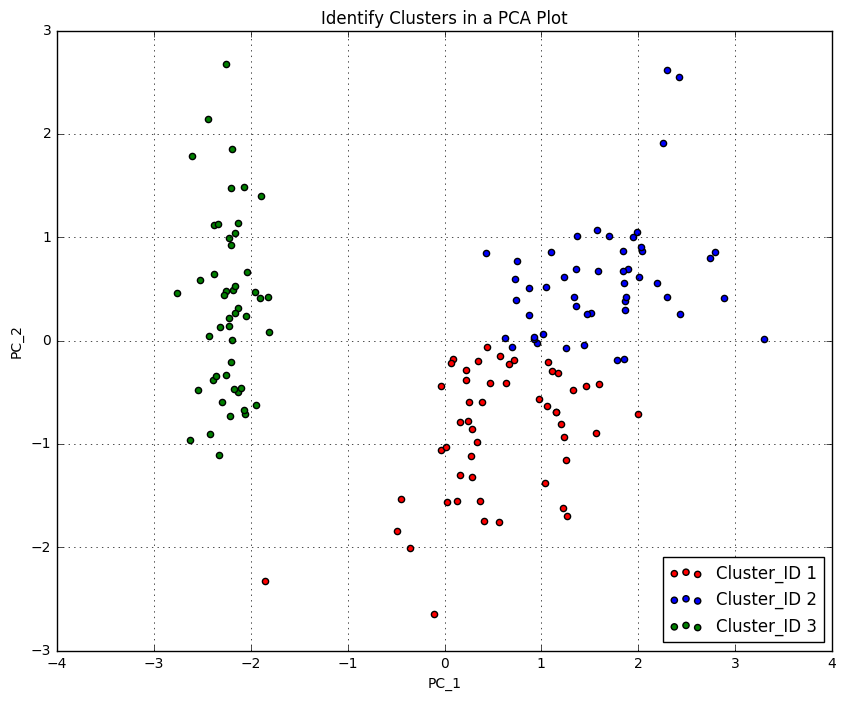

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(scoredKClus_df['Score1'][scoredKClus_df['_CLUSTER_ID_'] == 1], 
            scoredKClus_df['Score2'][scoredKClus_df['_CLUSTER_ID_'] == 1], 
            c='r', label="Cluster_ID 1")
plt.scatter(scoredKClus_df['Score1'][scoredKClus_df['_CLUSTER_ID_'] == 2], 
            scoredKClus_df['Score2'][scoredKClus_df['_CLUSTER_ID_'] == 2], 
            c='b', label="Cluster_ID 2")
plt.scatter(scoredKClus_df['Score1'][scoredKClus_df['_CLUSTER_ID_'] == 3], 
            scoredKClus_df['Score2'][scoredKClus_df['_CLUSTER_ID_'] == 3], 
            c='g', label="Cluster_ID 3")
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.grid(True)
plt.legend(loc="lower right")
plt.title("Identify Clusters in a PCA Plot");

### End CAS session

In [13]:
sess.close()